In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

In [19]:
data = pd.read_csv("edelweiss_GGA1_pointData.txt", skiprows=1, \
                       names=['Erecoil_keV', 'yield'], \
                       delim_whitespace=True)

In [4]:
res_data.head(4)

,Erecoil_keV,yield
0,104.1920,1.150560
1,120.3400,1.018400
2,127.9750,0.988728
3,22.3243,0.400158


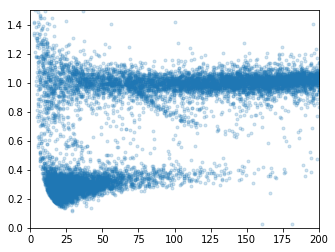

In [18]:
plt.plot(data['Erecoil_keV'], data['yield'], '.', alpha=0.2)
#plt.plot(path1_arr[:,0], path1_arr[:,1],'r--')
#minorLocatorX = MultipleLocator(10)
#minorLocatorY = MultipleLocator(0.1)
ax = plt.gca()
#ax.xaxis.set_minor_locator(minorLocatorX)
#ax.yaxis.set_minor_locator(minorLocatorY)
#plt.ylim(min(graph_points_GGA1[:,1]),max(graph_points_GGA1[:,1]))
#plt.yticks(list(set(graph_points_GGA1[:,1])))
#plt.tick_params(which="major", right=True, top=True, direction="in", length=12)
#plt.tick_params(which="minor", right=True, top=True, direction="in", length=10)
# see https://jdhao.github.io/2017/06/03/change-aspect-ratio-in-mpl/
ax.set_aspect(0.75*1.0/ax.get_data_ratio())
plt.xlim(0,200)
plt.ylim(0,1.5)
#plt.xticks(list(set(graph_points_GGA1[:,0])))
plt.show()

In [16]:
bin_edges_ER = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 200])
bin_edges_NR = np.array([0, 10, 20, 30, 40, 50, 75, 150])
labels_ER = np.arange(0,len(bin_edges_ER)-1, step=1)
print (bin_edges_ER, labels_ER)

[  0  20  40  60  80 100 120 140 160 200] [0 1 2 3 4 5 6 7 8]


In [40]:
data['binER'] = pd.cut(data['Erecoil_keV'], bins=bin_edges_ER) #, labels=labels_ER)
data['binNR'] = pd.cut(data['Erecoil_keV'], bins=bin_edges_NR)
data.head(5)
#data.binER.unique()

,Erecoil_keV,yield,binER,binNR
0,104.1920,1.150560,"(100, 120]","(75, 150]"
1,120.3400,1.018400,"(120, 140]","(75, 150]"
2,127.9750,0.988728,"(120, 140]","(75, 150]"
3,22.3243,0.400158,"(20, 40]","(20, 30]"
4,111.5070,1.025590,"(100, 120]","(75, 150]"


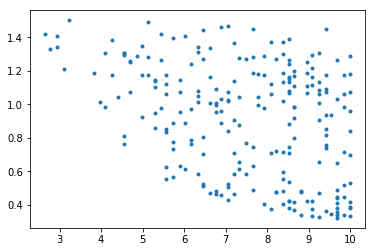

In [41]:
bin_idx = "(0, 10]"
plt.plot(data[data['binNR'] == bin_idx]["Erecoil_keV"], data[data['binNR'] == bin_idx]["yield"], '.')

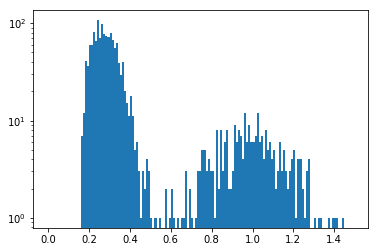

In [43]:
binspace = 0.01
hist_bins = np.arange(0, 1.5, binspace)
bin_idx = "(10, 20]"
n, bins = np.histogram(data[data['binNR'] == bin_idx]["yield"], bins=hist_bins)
fig = plt.hist(data[data['binNR'] == bin_idx]["yield"], bins=hist_bins, log=True)

In [48]:
from lmfit.models import  GaussianModel

gmodel = GaussianModel()
params = gmodel.make_params()
gmodel.param_names

['sigma', 'center', 'amplitude', 'fwhm', 'height']

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 49
    # variables        = 3
    chi-square         = 161976.375
    reduced chi-square = 3521.22554
    Akaike info crit   = 403.065888
    Bayesian info crit = 408.741349
[[Variables]]
    sigma:      0.06553561 +/- 0.00361971 (5.52%) (init = 1)
    center:     0.26615782 +/- 0.00276878 (1.04%) (init = 0)
    amplitude:  14.5219294 +/- 0.64566495 (4.45%) (init = 1)
    fwhm:       0.15432456 +/- 0.00852377 (5.52%) == '2.3548200*sigma'
    height:     88.4009798 +/- 2.59297251 (2.93%) == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude)  =  0.848
    C(sigma, center)     = -0.162
    C(center, amplitude) = -0.149



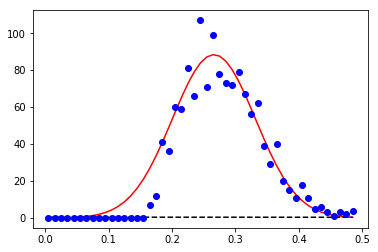

In [62]:
yield_idx = "(10, 20]"
min_yield = 0
max_yield = 0.5
binspace = 0.01
hist_bins = np.arange(min_yield, max_yield, binspace)
n, bins = np.histogram(data[data['binNR'] == yield_idx]["yield"], bins=hist_bins)
lower = np.resize(bins, len(bins)-1)
tmid = lower + 0.5*np.diff(bins)

# guess the parameters, and then fit
gmodel.guess(n, x=tmid)
result = gmodel.fit(n, x=tmid, weights=np.sqrt(n))
print(result.fit_report())

plt.plot(tmid, result.best_fit, 'r-')
plt.plot(tmid, result.init_fit, 'k--')
plt.plot(tmid, n,         'bo')

In [13]:
a = data.groupby(pd.cut(data['Erecoil_keV'], bins=bin_edges_ER))['yield'].apply(list)
print (a[4])

[0.978083, 0.985577, 1.02674, 0.871259, 1.0192700000000001, 0.309168, 0.983252, 0.37049099999999996, 0.868959, 0.915601, 0.340837, 1.01609, 0.904933, 0.365327, 0.34313699999999997, 1.0057200000000002, 1.06389, 0.362147, 0.803446, 1.02243, 1.05007, 1.04057, 0.379134, 0.925104, 0.347171, 0.94726, 1.0829, 0.772774, 0.353501, 1.00024, 0.82978, 0.329327, 0.9895889999999999, 0.9832639999999999, 0.8785950000000001, 0.9432370000000001, 0.382306, 1.0152299999999999, 0.9559030000000001, 0.6109319999999999, 0.291162, 0.330338, 1.05208, 0.34313299999999997, 0.348327, 0.956918, 1.03525, 1.01522, 0.868944, 0.989606, 0.9950700000000001, 0.372798, 0.9844120000000001, 0.376834, 1.0077399999999999, 1.0192700000000001, 0.437302, 0.42463199999999995, 1.02041, 0.7937960000000001, 0.8859469999999999, 1.01091, 1.04576, 0.9919100000000001, 1.06072, 1.0014, 0.993915, 0.385465, 0.805609, 1.03624, 0.973765, 0.805606, 0.9345959999999999, 1.04893, 1.02041, 1.06274, 0.385479, 0.81626, 0.9705889999999999, 1.02674, 1